In [3]:
# Import models and dependencies 

import pandas as pd 
import sklearn.datasets
import matplotlib.pyplot as plt 
import numpy as np 
import plotly.express as px 
import tensorflow as tf 
import hvplot.pandas 
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
import tensorflow as tf

# For the final submission Deep Learning Neural Network models have been removed in Favor of RandomForestClassifier, which is ther better performer when measured by accuracy

### - Analysis of card types has been expanded from just Golden Cards to all 4 classes of Cards
### - Rank of feature importance has been added to the analysis

In [4]:
# Read dataset
df = pd.read_csv("Resources/customer_data.csv")
df


,Unnamed: 0,id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,0,0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers
1,1,1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery
2,2,2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings
3,3,3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery
4,4,4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Salem,OR,Radio,50.79,Double Down Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,60421,60421,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,$130K - $150K,0.0,San Francisco,CA,Cash Register Handout,127.19,Green Light Special
38888,60422,60422,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,$50K - $70K,0.0,San Francisco,CA,"Sunday Paper, Radio",78.45,Unbeatable Price Savers
38889,60423,60423,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,San Francisco,CA,In-Store Coupon,95.25,You Save Days
38890,60424,60424,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,San Francisco,CA,Sunday Paper,69.42,Price Cutters


In [5]:
# Information about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38892 entries, 0 to 38891
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                38892 non-null  int64  
 1   id                        38892 non-null  int64  
 2   marital_status            38892 non-null  object 
 3   gender                    38892 non-null  object 
 4   total_children            38892 non-null  float64
 5   education                 38892 non-null  object 
 6   member_card               38892 non-null  object 
 7   occupation                38892 non-null  object 
 8   houseowner                38892 non-null  object 
 9   avg_cars_at home(approx)  38892 non-null  float64
 10  avg. yearly_income        38892 non-null  object 
 11  num_children_at_home      38892 non-null  float64
 12  store_city                38892 non-null  object 
 13  store_state               38892 non-null  object 
 14  media_

In [6]:
# Drop non-beneficial columns
df = df.drop(columns=['Unnamed: 0', 'id', 'cost', 'promotion_name', 'store_city', 'store_state', 'media_type'], axis=1)
df

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0
...,...,...,...,...,...,...,...,...,...,...
38887,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,$130K - $150K,0.0
38888,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,$50K - $70K,0.0
38889,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0
38890,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0


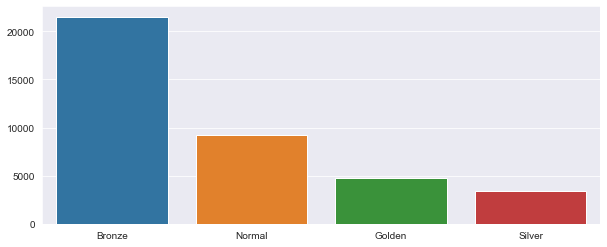

In [7]:
# Plot distribution of member status
member_card = df.member_card.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=member_card.index, y=member_card.values)
plt.show()


### Preprocessing with OneHotEncoder

In [8]:
# Generate our categorical variable list
df_cat = df.dtypes[df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
df[df_cat].nunique()


marital_status        2
gender                2
education             5
member_card           4
occupation            5
houseowner            2
avg. yearly_income    8
dtype: int64

In [9]:
# Check the unique value counts to see if binning is required
df.member_card.value_counts()

Bronze    21505
Normal     9253
Golden     4732
Silver     3402
Name: member_card, dtype: int64

In [10]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(df[df_cat]))

# Add the encoded variable names to the DataFrame
encode_df.columns = enc.get_feature_names(df_cat)
encode_df

/Users/giannimarco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,marital_status_M,marital_status_S,gender_F,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,education_Partial College,education_Partial High School,member_card_Bronze,...,houseowner_N,houseowner_Y,avg. yearly_income_$10K - $30K,avg. yearly_income_$110K - $130K,avg. yearly_income_$130K - $150K,avg. yearly_income_$150K +,avg. yearly_income_$30K - $50K,avg. yearly_income_$50K - $70K,avg. yearly_income_$70K - $90K,avg. yearly_income_$90K - $110K
0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38888,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38889,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38890,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [11]:
# Merge one-hot encoded features and drop the originals
df = df.merge(encode_df,left_index=True, right_index=True)
df = df.drop(df_cat,1)
df


/Users/giannimarco/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,total_children,avg_cars_at home(approx),num_children_at_home,marital_status_M,marital_status_S,gender_F,gender_M,education_Bachelors Degree,education_Graduate Degree,education_High School Degree,...,houseowner_N,houseowner_Y,avg. yearly_income_$10K - $30K,avg. yearly_income_$110K - $130K,avg. yearly_income_$130K - $150K,avg. yearly_income_$150K +,avg. yearly_income_$30K - $50K,avg. yearly_income_$50K - $70K,avg. yearly_income_$70K - $90K,avg. yearly_income_$90K - $110K
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,4.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,2.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
38888,1.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
38889,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38890,2.0,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
# iterating the columns
for col in df.columns:
    print(col)


total_children
avg_cars_at home(approx)
num_children_at_home
marital_status_M
marital_status_S
gender_F
gender_M
education_Bachelors Degree
education_Graduate Degree
education_High School Degree
education_Partial College
education_Partial High School
member_card_Bronze
member_card_Golden
member_card_Normal
member_card_Silver
occupation_Clerical
occupation_Management
occupation_Manual
occupation_Professional
occupation_Skilled Manual
houseowner_N
houseowner_Y
avg. yearly_income_$10K - $30K
avg. yearly_income_$110K - $130K
avg. yearly_income_$130K - $150K
avg. yearly_income_$150K +
avg. yearly_income_$30K - $50K
avg. yearly_income_$50K - $70K
avg. yearly_income_$70K - $90K
avg. yearly_income_$90K - $110K


### RandomForest Classification model with Gold Card as a Target

In [13]:

# Remove member_card target from features data
y = df.member_card_Golden
X = df.drop(columns=["member_card_Bronze","member_card_Golden","member_card_Normal", "member_card_Silver"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.981


#### Feature Importance

In [15]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.13708343, 0.11643801, 0.35514868, 0.03059073, 0.02637879,
       0.02033108, 0.02053535, 0.01267494, 0.00495799, 0.01879316,
       0.01302803, 0.02183921, 0.0025666 , 0.01323272, 0.0112351 ,
       0.01760618, 0.01299465, 0.01244004, 0.01359178, 0.0349798 ,
       0.00975501, 0.01271884, 0.03333317, 0.01560131, 0.01345977,
       0.01184752, 0.00683813])

In [16]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.35514867752515666, 'num_children_at_home'),
 (0.13708343385761945, 'total_children'),
 (0.11643801260433109, 'avg_cars_at home(approx)'),
 (0.03497979817940363, 'avg. yearly_income_$10K - $30K'),
 (0.03333316676135032, 'avg. yearly_income_$150K +'),
 (0.03059072879822882, 'marital_status_M'),
 (0.02637878754608638, 'marital_status_S'),
 (0.021839214533646283, 'education_Partial High School'),
 (0.020535354085038697, 'gender_M'),
 (0.020331082532077657, 'gender_F'),
 (0.01879316057047779, 'education_High School Degree'),
 (0.01760617525711622, 'occupation_Professional'),
 (0.015601309851832534, 'avg. yearly_income_$30K - $50K'),
 (0.013591784448319598, 'houseowner_Y'),
 (0.013459774370279001, 'avg. yearly_income_$50K - $70K'),
 (0.013232717904744683, 'occupation_Management'),
 (0.01302802660245274, 'education_Partial College'),
 (0.012994647163980208, 'occupation_Skilled Manual'),
 (0.012718839204752126, 'avg. yearly_income_$130K - $150K'),
 (0.012674936717449098, 'education_Bachelo

#### Generate a confusion Matrix

In [17]:
#View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[8510,   76],
       [ 109, 1028]])

In [ ]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Spruce/Fir', 'Lodgepole Pine', 'Ponderosa Pine', 
               'Cottonwood/Willow', 'Aspen', 'Douglas-fir',    
               'Krummholz']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

### RandomForest Classification model with Normal Card as a Target

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

In [15]:
# Remove member_card target from features data
y = df.member_card_Normal
X = df.drop(columns=["member_card_Bronze","member_card_Golden","member_card_Normal", "member_card_Silver"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.977


#### Feature Importance

In [17]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.06243877, 0.12060135, 0.03225572, 0.00538806, 0.00565041,
       0.00805287, 0.00783077, 0.01057531, 0.00227289, 0.017308  ,
       0.00574725, 0.16372162, 0.00109357, 0.01682774, 0.01346549,
       0.02762042, 0.01682606, 0.00809404, 0.00813019, 0.37830412,
       0.00421873, 0.00591132, 0.00084119, 0.05476908, 0.01197882,
       0.00629493, 0.0037813 ])

In [18]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.37830411519858764, 'avg. yearly_income_$10K - $30K'),
 (0.1637216184759539, 'education_Partial High School'),
 (0.1206013540191229, 'avg_cars_at home(approx)'),
 (0.062438767791528425, 'total_children'),
 (0.05476908471904717, 'avg. yearly_income_$30K - $50K'),
 (0.03225571606270842, 'num_children_at_home'),
 (0.02762041540237609, 'occupation_Professional'),
 (0.01730799707575617, 'education_High School Degree'),
 (0.01682774445349638, 'occupation_Management'),
 (0.01682605653753792, 'occupation_Skilled Manual'),
 (0.013465485534113336, 'occupation_Manual'),
 (0.011978822176588313, 'avg. yearly_income_$50K - $70K'),
 (0.010575310800382284, 'education_Bachelors Degree'),
 (0.008130186070689724, 'houseowner_Y'),
 (0.008094038341494757, 'houseowner_N'),
 (0.008052872358025404, 'gender_F'),
 (0.007830768408868516, 'gender_M'),
 (0.0062949341126011206, 'avg. yearly_income_$70K - $90K'),
 (0.0059113193660223625, 'avg. yearly_income_$130K - $150K'),
 (0.005747247887326487, 'education_Part

### RandomForest Classification model with Silver Card as a Target

In [19]:
# Remove member_card target from features data
y = df.member_card_Silver
X = df.drop(columns=["member_card_Bronze","member_card_Golden","member_card_Normal", "member_card_Silver"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [20]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.972


#### Feature Importance

In [21]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.21582699, 0.15430786, 0.11510498, 0.03388979, 0.03106285,
       0.03258446, 0.02990603, 0.02056723, 0.0125707 , 0.02438846,
       0.01575996, 0.0199665 , 0.00436246, 0.01723216, 0.01157124,
       0.02173302, 0.01055354, 0.0287296 , 0.02905055, 0.01032224,
       0.01496585, 0.02046701, 0.05775994, 0.01800587, 0.02048046,
       0.01673036, 0.01209989])

In [22]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2158269892353026, 'total_children'),
 (0.15430786129868868, 'avg_cars_at home(approx)'),
 (0.1151049781234611, 'num_children_at_home'),
 (0.05775993648879141, 'avg. yearly_income_$150K +'),
 (0.03388978713698603, 'marital_status_M'),
 (0.03258446285563772, 'gender_F'),
 (0.031062846605932906, 'marital_status_S'),
 (0.02990603221653108, 'gender_M'),
 (0.02905055014950297, 'houseowner_Y'),
 (0.028729595207970055, 'houseowner_N'),
 (0.02438846344868286, 'education_High School Degree'),
 (0.02173302499024837, 'occupation_Professional'),
 (0.02056723388975604, 'education_Bachelors Degree'),
 (0.020480459453302246, 'avg. yearly_income_$50K - $70K'),
 (0.020467007939309324, 'avg. yearly_income_$130K - $150K'),
 (0.01996649960705316, 'education_Partial High School'),
 (0.018005872112773814, 'avg. yearly_income_$30K - $50K'),
 (0.017232163373074788, 'occupation_Management'),
 (0.016730361056640625, 'avg. yearly_income_$70K - $90K'),
 (0.015759960080288907, 'education_Partial College'),
 (0.

### RandomForest Classification model with Bronze Card as a Target

In [23]:
# Remove member_card target from features data
y = df.member_card_Bronze
X = df.drop(columns=["member_card_Bronze","member_card_Golden","member_card_Normal", "member_card_Silver"])

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [24]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.950


#### Feature Importance

In [25]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.11935529, 0.11579887, 0.19103415, 0.01572173, 0.01530711,
       0.01469409, 0.01484418, 0.01363925, 0.00540299, 0.01603808,
       0.01046892, 0.08236007, 0.00275823, 0.0135807 , 0.01222231,
       0.01902889, 0.01210772, 0.01151878, 0.01196659, 0.17576673,
       0.00751448, 0.01035765, 0.03547811, 0.03623279, 0.016361  ,
       0.01289189, 0.0075494 ])

In [26]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.19103415367884938, 'num_children_at_home'),
 (0.17576673175763421, 'avg. yearly_income_$10K - $30K'),
 (0.11935529245104846, 'total_children'),
 (0.11579886849098886, 'avg_cars_at home(approx)'),
 (0.08236007391561993, 'education_Partial High School'),
 (0.03623278597112144, 'avg. yearly_income_$30K - $50K'),
 (0.03547811433122394, 'avg. yearly_income_$150K +'),
 (0.019028889374395147, 'occupation_Professional'),
 (0.016360999558165522, 'avg. yearly_income_$50K - $70K'),
 (0.01603807585214913, 'education_High School Degree'),
 (0.01572173046525441, 'marital_status_M'),
 (0.015307106127534704, 'marital_status_S'),
 (0.014844176807753169, 'gender_M'),
 (0.014694091361632312, 'gender_F'),
 (0.013639249989968828, 'education_Bachelors Degree'),
 (0.013580700726815616, 'occupation_Management'),
 (0.012891893561653623, 'avg. yearly_income_$70K - $90K'),
 (0.012222309745035777, 'occupation_Manual'),
 (0.012107716269010903, 'occupation_Skilled Manual'),
 (0.011966589810224323, 'houseowner_Y

## Random Forest with LabelEncoder

In [19]:
customer_df = pd.read_csv("Resources/customer_data.csv")

customer_df

,Unnamed: 0,id,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home,store_city,store_state,media_type,cost,promotion_name
0,0,0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,Salem,OR,"Daily Paper, Radio",126.62,Bag Stuffers
1,1,1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0,Salem,OR,"Daily Paper, Radio",59.86,Cash Register Lottery
2,2,2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0,Salem,OR,"Daily Paper, Radio",84.16,High Roller Savings
3,3,3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0,Salem,OR,In-Store Coupon,95.78,Cash Register Lottery
4,4,4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,Salem,OR,Radio,50.79,Double Down Sale
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38887,60421,60421,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,$130K - $150K,0.0,San Francisco,CA,Cash Register Handout,127.19,Green Light Special
38888,60422,60422,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,$50K - $70K,0.0,San Francisco,CA,"Sunday Paper, Radio",78.45,Unbeatable Price Savers
38889,60423,60423,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0,San Francisco,CA,In-Store Coupon,95.25,You Save Days
38890,60424,60424,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0,San Francisco,CA,Sunday Paper,69.42,Price Cutters


In [20]:
# Drop non-beneficial columns
customer_df = customer_df.drop(columns=['Unnamed: 0', 'id', 'cost', 'promotion_name', 'store_city', 'store_state', 'media_type'], axis=1)
customer_df

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home
0,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0
1,M,M,0.0,Bachelors Degree,Silver,Professional,Y,4.0,$50K - $70K,0.0
2,S,F,4.0,Partial High School,Normal,Manual,N,1.0,$10K - $30K,0.0
3,M,F,2.0,High School Degree,Bronze,Manual,Y,2.0,$30K - $50K,2.0
4,M,M,0.0,Partial High School,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0
...,...,...,...,...,...,...,...,...,...,...
38887,S,F,2.0,High School Degree,Bronze,Professional,Y,3.0,$130K - $150K,0.0
38888,S,F,1.0,Partial High School,Bronze,Skilled Manual,N,2.0,$50K - $70K,0.0
38889,M,F,1.0,Partial High School,Normal,Skilled Manual,Y,1.0,$10K - $30K,1.0
38890,S,F,2.0,High School Degree,Bronze,Skilled Manual,N,2.0,$30K - $50K,0.0


In [21]:
# Use LabelEncoder to encode categorical columns.
le = LabelEncoder()

customer_enc = customer_df.apply(le.fit_transform)

customer_enc

,marital_status,gender,total_children,education,member_card,occupation,houseowner,avg_cars_at home(approx),avg. yearly_income,num_children_at_home
0,0,0,1,4,2,4,1,1,0,1
1,0,1,0,0,3,3,1,4,5,0
2,1,0,4,4,2,2,0,1,0,0
3,0,0,2,2,0,2,1,2,4,2
4,0,1,0,4,0,4,0,2,4,0
...,...,...,...,...,...,...,...,...,...,...
38887,1,0,2,2,0,3,1,3,2,0
38888,1,0,1,4,0,4,0,2,5,0
38889,0,0,1,4,2,4,1,1,0,1
38890,1,0,2,2,0,4,0,2,4,0


In [24]:
# Remove member_card target from features data
y = customer_enc['member_card']
X = customer_enc.drop("member_card", axis=1)

# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)#, stratify=y)

# Create a StandardScaler instance
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [25]:
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=128, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.940


#### Feature Importance

In [26]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importances

array([0.02552603, 0.03691616, 0.09414392, 0.12979052, 0.05641719,
       0.02783756, 0.11053399, 0.35033043, 0.16850421])

In [27]:
# Sort the features by their importance.
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3503304274146414, 'avg. yearly_income'),
 (0.16850421180244787, 'num_children_at_home'),
 (0.12979052012687198, 'education'),
 (0.11053399163387648, 'avg_cars_at home(approx)'),
 (0.0941439219240621, 'total_children'),
 (0.05641718758122511, 'occupation'),
 (0.036916155537597875, 'gender'),
 (0.027837557929498886, 'houseowner'),
 (0.02552602604977839, 'marital_status')]

#### Confusion Matrix

In [28]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred)

array([[5185,   45,   86,   53],
       [  80, 1035,   16,    6],
       [  58,   27, 2229,   15],
       [ 163,   13,   19,  693]])

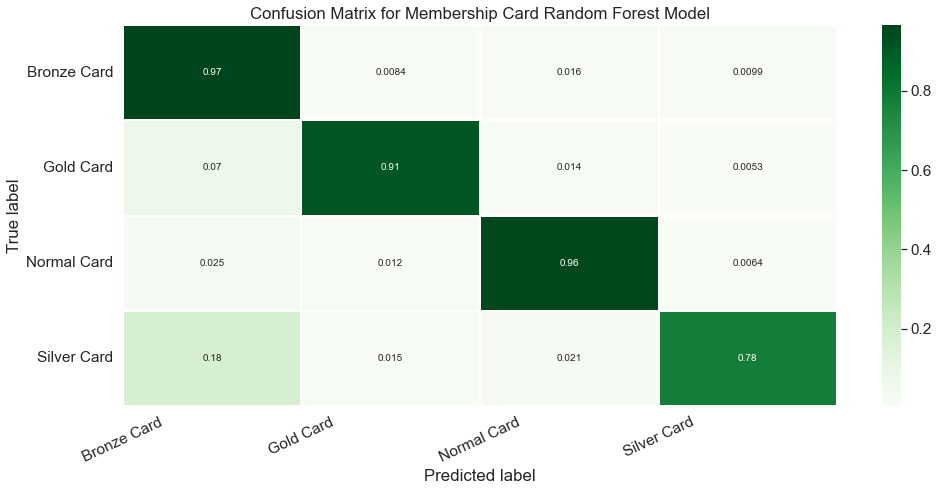

In [32]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Bronze Card', 'Gold Card', 'Normal Card', 
               'Silver Card']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Membership Card Random Forest Model')
plt.show()

In [33]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      5369
           1       0.92      0.91      0.92      1137
           2       0.95      0.96      0.95      2329
           3       0.90      0.78      0.84       888

    accuracy                           0.94      9723
   macro avg       0.93      0.90      0.92      9723
weighted avg       0.94      0.94      0.94      9723



### Conclusion: 
- There's a diverse range of feature importance across Card Types when analyzed individually via OneHotEncoder 
- Interestingly- predective accuracy for Bronze cards is the lowest of the 4 card types when preprocessed with OneHotEncoder but highest when processed with LabelEncoder. 
- When analyzed independently with OneHotEncoder, it appears that Bronze Cards are the class of cards most widely dispersed across varied Customer Demographics